In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
df =pd.read_csv(r"C:\Users\bajpa\Downloads\PAN+Card+Validation+in+PYTHON+-+Scripts\MusicData.csv")
df.head()

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1,1,CD,Units,1974,1,NaN
2,2,CD,Units,1975,1,NaN
3,3,CD,Units,1976,1,NaN
4,4,CD,Units,1977,1,NaN


In [3]:
df.tail()

,index,Format,Metric,Year,Number of Records,Value (Actual)
3003,3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,3006,Vinyl Single,Value (Adjusted),2018,1,5.386197
3007,3007,Vinyl Single,Value (Adjusted),2019,1,6.795946


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3008 non-null   int64  
 1   Format             3008 non-null   object 
 2   Metric             3008 non-null   object 
 3   Year               3008 non-null   int64  
 4   Number of Records  3008 non-null   int64  
 5   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 141.1+ KB


In [5]:
df.describe()

,index,Year,Number of Records,Value (Actual)
count,3008.00000,3008.000000,3008.0,1351.000000
mean,1503.50000,1996.000000,1.0,781.291237
std,868.47913,13.566915,0.0,2246.837672
min,0.00000,1973.000000,1.0,-7.650944
25%,751.75000,1984.000000,1.0,3.700228
50%,1503.50000,1996.000000,1.0,63.900000
75%,2255.25000,2008.000000,1.0,448.900000
max,3007.00000,2019.000000,1.0,19667.327786


In [6]:
len(df)

3008

In [7]:
df["Format"].nunique()

24

In [8]:
df["Metric"].unique()

array(['Units', 'Value', 'Value (Adjusted)'], dtype=object)

In [9]:
yearly_mean = df.groupby("Year")["Value (Actual)"].mean()

In [10]:
type(yearly_mean)

pandas.core.series.Series

In [16]:
yearly_mean = df.groupby("Year")["Value (Actual)"].mean().sort_values(ascending=False).head(15)

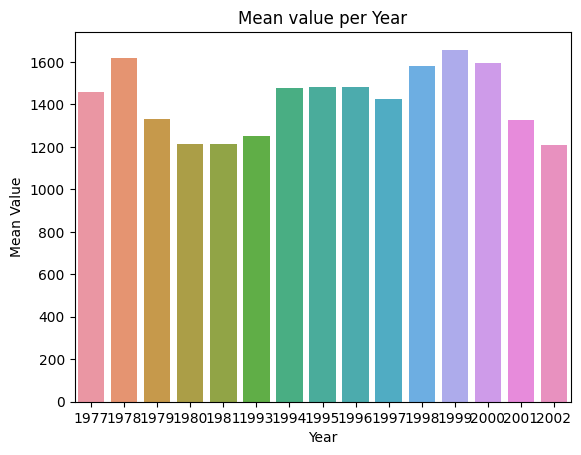

In [17]:
sns.barplot(x = yearly_mean.index, y= yearly_mean.values)
plt.title("Mean value per Year")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.show()

In [18]:
df["Format"].value_counts().head(3)

Format
CD                       141
DVD Audio                141
Ringtones & Ringbacks    141
Name: count, dtype: int64

In [20]:
df_sorted = df.sort_values("Year")

In [21]:
df_sorted

,index,Format,Metric,Year,Number of Records,Value (Actual)
0,0,CD,Units,1973,1,NaN
1833,1833,Synchronization,Value,1973,1,NaN
2773,2773,Ringtones & Ringbacks,Value (Adjusted),1973,1,NaN
1786,1786,SoundExchange Distributions,Value,1973,1,NaN
611,611,Kiosk,Units,1973,1,NaN
...,...,...,...,...,...,...
1644,1644,Other Tapes,Value,2019,1,NaN
1597,1597,Other Digital,Value,2019,1,21.517175
1550,1550,Other Ad-Supported Streaming,Value,2019,1,251.064710
2161,2161,Cassette Single,Value (Adjusted),2019,1,NaN


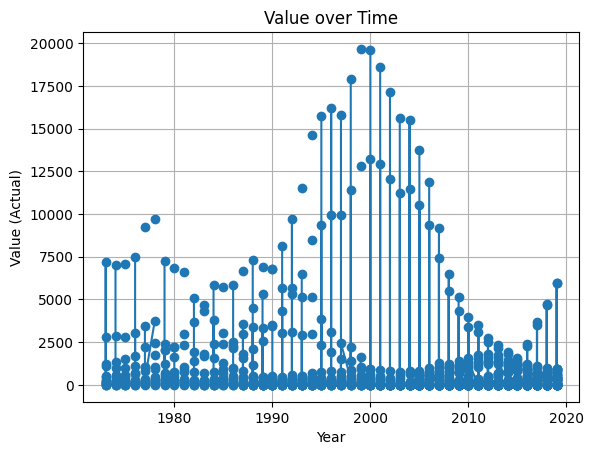

In [24]:
plt.plot(df_sorted["Year"], df_sorted["Value (Actual)"], marker="o")
plt.title("Value over Time")
plt.xlabel("Year")
plt.ylabel("Value (Actual)")
plt.grid(True)
plt.show()


In [25]:
df.groupby("Format")["Value (Actual)"].sum()

Format
8 - Track                              30159.456658
CD                                    525411.020874
CD Single                               4353.296903
Cassette                              157208.102797
Cassette Single                         7227.226130
DVD Audio                                153.856707
Download Album                         25107.065340
Download Music Video                     724.891335
Download Single                        45894.155285
Kiosk                                    127.936032
LP/EP                                 127648.807493
Limited Tier Paid Subscription          4919.177543
Music Video (Physical)                 18437.062493
On-Demand Streaming (Ad-Supported)      8136.506182
Other Ad-Supported Streaming            1712.156423
Other Digital                            152.970122
Other Tapes                              280.680841
Paid Subscription                      42514.172158
Paid Subscriptions                       351.436772
Ringt

In [26]:
df.groupby("Metric")["Value (Actual)"].max()

Metric
Units                1402.739373
Value               13214.500000
Value (Adjusted)    19667.327786
Name: Value (Actual), dtype: float64

In [28]:
df.groupby(["Year","Format"])["Value (Actual)"].mean().reset_index()

,Year,Format,Value (Actual)
0,1973,8 - Track,1131.893941
1,1973,CD,NaN
2,1973,CD Single,NaN
3,1973,Cassette,176.203694
4,1973,Cassette Single,NaN
...,...,...,...
1123,2019,Ringtones & Ringbacks,17.153081
1124,2019,SACD,0.294753
1125,2019,SoundExchange Distributions,908.200000
1126,2019,Synchronization,276.262360


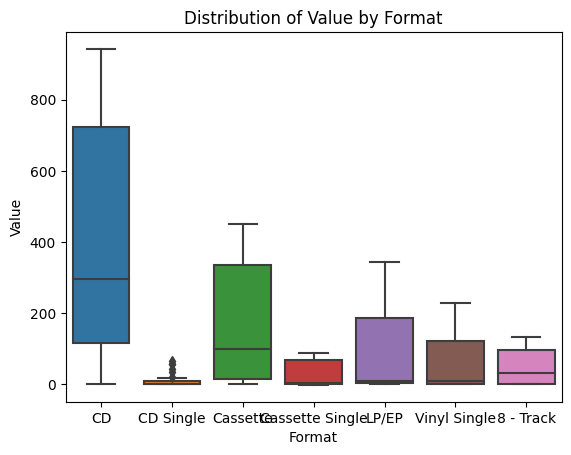

In [30]:
sns.boxplot(x = "Format", y = "Value (Actual)", data = df.head(300))
plt.title("Distribution of Value by Format")
plt.xlabel("Format")
plt.ylabel("Value")
plt.show()

C:\Users\bajpa\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


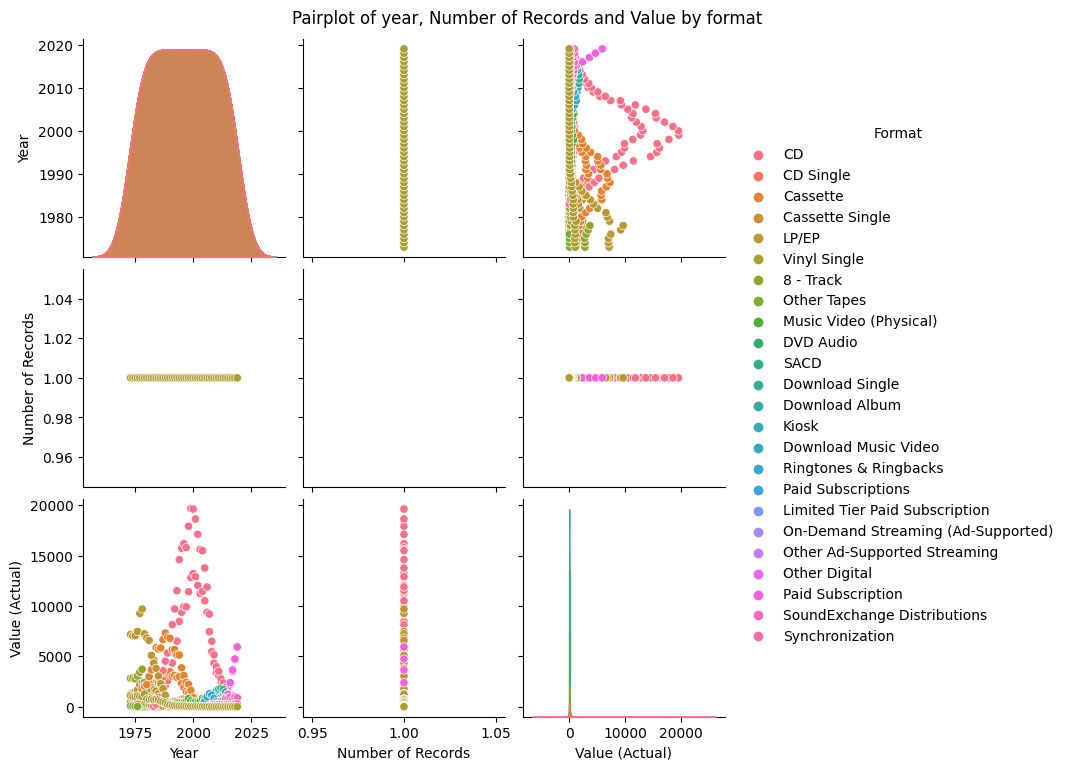

In [31]:
sns.pairplot(df, vars = ["Year","Number of Records", "Value (Actual)"],hue = "Format")
plt.suptitle("Pairplot of year, Number of Records and Value by format", y = 1.02)
plt.show()

In [32]:
year_metric_sum = df.groupby(["Year", "Metric"])["Value (Actual)"].sum().unstack()

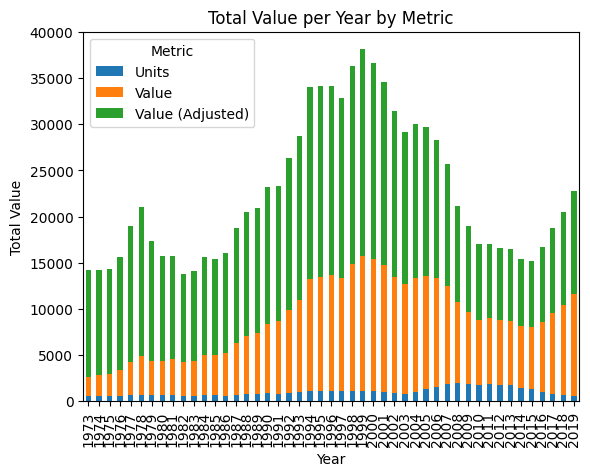

In [34]:
year_metric_sum.plot(kind = "bar", stacked = True)
plt.title("Total Value per Year by Metric")
plt.xlabel("Year")
plt.ylabel("Total Value")
plt.show()

In [35]:
format_year_avg = df.groupby(["Format", "Year"])["Value (Actual)"].mean().head(200).unstack()

In [36]:
format_year_avg

Year,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Format,,,,,,,,,,,,,,,,,,,,,
8 - Track,1131.893941,1164.636203,1149.336499,1277.171924,1453.238762,1599.607137,1065.441897,749.029284,414.438361,48.358211,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2538.753058,2288.545381,1817.185078,1554.748639,1277.722267,1040.256899,810.946500,749.259981,487.127384,425.175352
CD Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.433356,2.925988,2.629721,1.919563,2.816588,0.958249,0.221769,1.051190,0.111335,0.129872
Cassette,176.203694,184.898853,194.832166,274.047890,446.501030,758.273203,901.217237,997.118871,1391.977923,1745.216465,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cassette Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


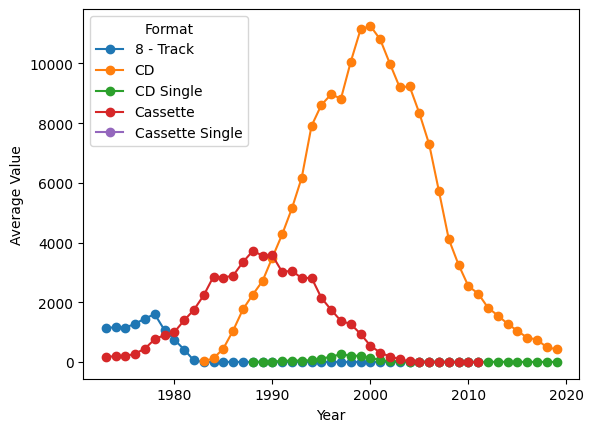

In [37]:
format_year_avg.T.plot(marker="o")
plt.ylabel("Average Value")
plt.xlabel("Year")
plt.show()